Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Read the dataset

In [2]:
df_train = pd.read_csv("../input/alphabet-recogniser/train.csv").astype('float32')

In [3]:
df_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297955,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297956,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297957,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297958,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
297955,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297956,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297957,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297958,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297959,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_test = pd.read_csv("../input/alphabet-recogniser/test.csv").astype('float32')

In [6]:
df_test

,Unnamed: 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74485,74485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74486,74486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74487,74487.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74488,74488.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


splitting training dataset into labels and images

In [7]:
x = df_train.drop('0',axis = 1)  # this are the inputs for training the data
y = df_train['0']     # this is the label extracted from the train.csv

In [8]:
x

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y

0          1.0
1         18.0
2          1.0
3         18.0
4         18.0
          ... 
297955    18.0
297956    24.0
297957    13.0
297958    14.0
297959    13.0
Name: 0, Length: 297960, dtype: float32

Now I will reshape the dataset and divide the training dataset only into test and train data and later on use the actual test data to find the prediction

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train = np.reshape(x_train.values, (x_train.shape[0],28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0],28,28))

In [11]:
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)

Train data shape:  (238368, 28, 28)
Test data shape:  (59592, 28, 28)


now that we have converted the pandas dataframes to numpy array of 3D shape, we need to map the first column of numbers to corresponding letters.

In [12]:
w_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

plotting count of each alphabet in dataset

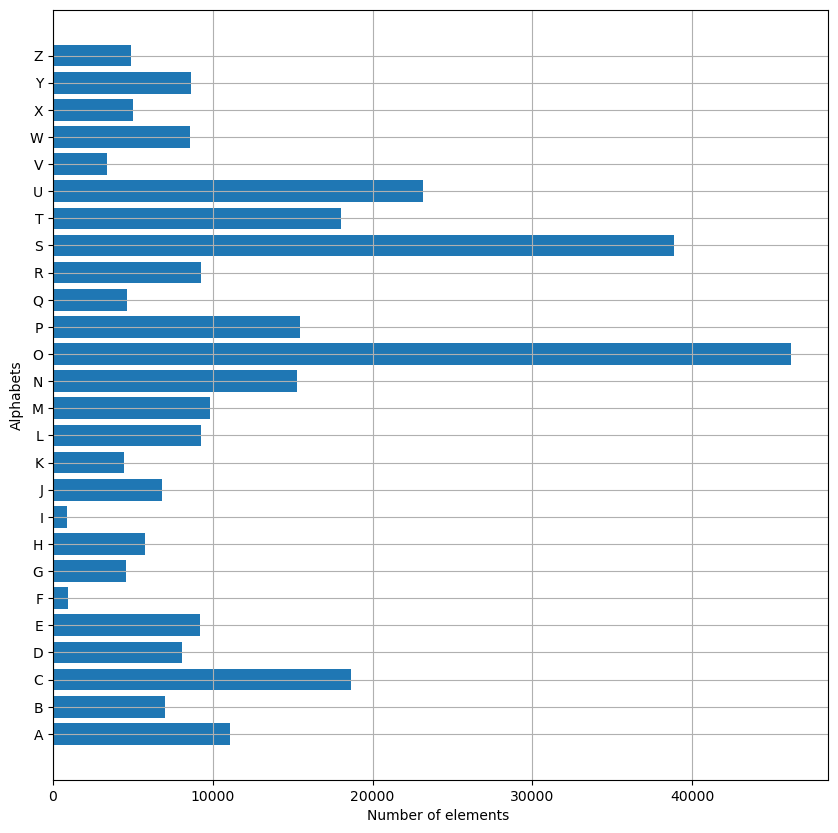

In [13]:
y_int = np.int0(y) # this is i think converting the alphabet numpy array to integers.
count = np.zeros(26, dtype = 'int') # we all know that this makes an array of size 26 with all values as 0
for i in y_int:
    count[i] += 1
alphabets = []
for i in w_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

Display few letters

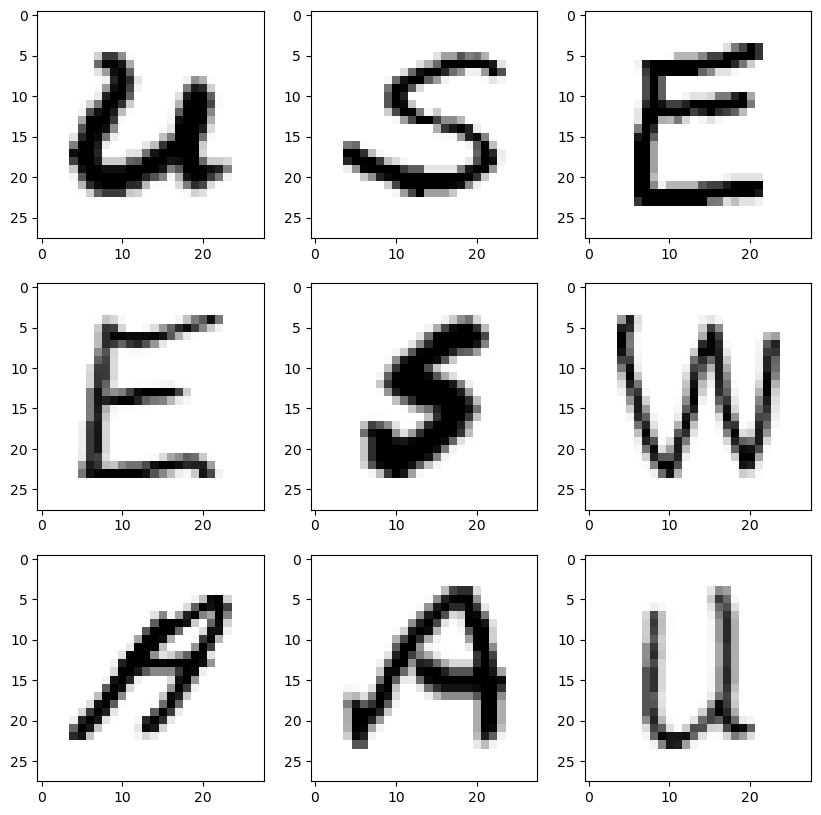

In [14]:
shuff = shuffle(x_train[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

Now I need to reshape the data to feed to my cnn model which i will make afterwards.

In [15]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print("New shape of train data: ", x_train.shape)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("new shape of the test data: ", x_test.shape)

New shape of train data:  (238368, 28, 28, 1)
new shape of the test data:  (59592, 28, 28, 1)


converting the float values to categorical values

In [16]:
new_train_y = to_categorical(y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", new_train_y.shape)

new_test_y = to_categorical(y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", new_test_y.shape)

New shape of train labels:  (238368, 26)
New shape of test labels:  (59592, 26)


Now I have to make the CNN model

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

Now i have to train the model

In [18]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, new_train_y, epochs=10,  validation_data = (x_test,new_test_y))

Epoch 1/10
7449/7449 [==============================] - 38s 4ms/step - loss: 0.1726 - accuracy: 0.9533 - val_loss: 0.1057 - val_accuracy: 0.9705
Epoch 2/10
7449/7449 [==============================] - 30s 4ms/step - loss: 0.0774 - accuracy: 0.9784 - val_loss: 0.0859 - val_accuracy: 0.9777
Epoch 3/10
7449/7449 [==============================] - 31s 4ms/step - loss: 0.0655 - accuracy: 0.9818 - val_loss: 0.0659 - val_accuracy: 0.9828
Epoch 4/10
7449/7449 [==============================] - 30s 4ms/step - loss: 0.0578 - accuracy: 0.9841 - val_loss: 0.0667 - val_accuracy: 0.9830
Epoch 5/10
7449/7449 [==============================] - 30s 4ms/step - loss: 0.0541 - accuracy: 0.9856 - val_loss: 0.0729 - val_accuracy: 0.9821
Epoch 6/10
7449/7449 [==============================] - 31s 4ms/step - loss: 0.0514 - accuracy: 0.9863 - val_loss: 0.0677 - val_accuracy: 0.9837
Epoch 7/10
7449/7449 [==============================] - 30s 4ms/step - loss: 0.0497 - accuracy: 0.9867 - val_loss: 0.0834 - val_ac

printing the model summary

In [19]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [20]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9705497622489929, 0.9777318835258484, 0.9828332662582397, 0.9830010533332825, 0.9821285009384155, 0.98373943567276, 0.9836219549179077, 0.9842092990875244, 0.985383927822113, 0.9830514192581177]
The training accuracy is : [0.9532991051673889, 0.9784115552902222, 0.981763482093811, 0.9841379523277283, 0.9855895042419434, 0.98628169298172, 0.9867096543312073, 0.9879807829856873, 0.987557053565979, 0.9881947040557861]
The validation loss is : [0.10568388551473618, 0.0859016701579094, 0.06586797535419464, 0.06672143191099167, 0.07290478050708771, 0.06768602877855301, 0.08335920423269272, 0.08113431185483932, 0.07118731737136841, 0.07945318520069122]
The training loss is : [0.17261645197868347, 0.07744060456752777, 0.06549666821956635, 0.057781610637903214, 0.05409490689635277, 0.051421716809272766, 0.04965655878186226, 0.04675012454390526, 0.04978083819150925, 0.047481782734394073]


In [23]:
df_test

,Unnamed: 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74485,74485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74486,74486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74487,74487.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74488,74488.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_test.shape

(74490, 785)

In [26]:
df_test.drop("Unnamed: 0", axis=1, inplace=True)

In [27]:
_df_test = np.reshape(df_test.values, (df_test.shape[0],28,28))

In [39]:
x = [f"col_{i}" for i in range(26)]

test_df=pd.DataFrame(columns=x)

In [40]:
arr = model.predict(_df_test, verbose=0).ravel()

In [41]:
arr.shape

(1936740,)

In [46]:
count = 0
for _ in range(df_test.shape[0]):
    x = []
    for i in range(26):
        val = arr[count]
        x.append(val)
        count += 1
    test_df.loc[len(test_df.index)] = x

In [47]:
test_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25
0,3.436791e-12,1.073927e-25,7.551939e-30,8.237360e-16,6.363669e-29,0.000000e+00,3.402815e-19,5.142188e-09,0.000000e+00,8.107977e-32,...,1.198037e-27,1.846108e-09,1.960065e-21,4.379130e-19,1.347743e-11,0.000000e+00,5.277938e-08,8.370268e-13,9.085740e-31,7.858581e-32
1,0.000000e+00,2.802289e-17,4.793880e-24,2.119004e-15,1.946311e-22,0.000000e+00,2.722901e-22,0.000000e+00,0.000000e+00,4.111350e-19,...,2.656745e-27,0.000000e+00,1.000000e+00,1.565201e-35,4.352608e-38,0.000000e+00,0.000000e+00,0.000000e+00,4.089464e-28,1.540994e-35
2,0.000000e+00,1.604034e-12,9.995321e-01,6.118837e-15,1.089859e-05,4.706084e-37,9.161380e-07,0.000000e+00,2.040118e-20,7.481498e-23,...,2.047778e-13,4.879866e-09,1.792364e-04,6.508759e-12,1.834996e-06,1.118512e-26,6.309440e-28,0.000000e+00,2.577301e-18,4.495466e-09
3,0.000000e+00,2.586265e-22,4.072432e-10,9.367352e-11,3.137798e-28,0.000000e+00,3.678931e-18,0.000000e+00,0.000000e+00,1.472765e-23,...,4.896945e-15,3.168418e-38,1.759734e-11,3.543644e-38,1.415115e-09,0.000000e+00,1.840547e-35,0.000000e+00,1.177110e-32,0.000000e+00
4,9.999974e-01,4.446950e-09,7.554281e-16,9.553315e-12,4.562973e-11,4.371850e-23,3.559287e-09,6.494824e-07,0.000000e+00,4.965103e-14,...,7.986883e-10,1.988654e-06,5.010181e-12,9.188470e-16,3.964294e-16,0.000000e+00,2.859099e-25,2.639289e-23,1.247450e-29,1.574564e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74485,8.343097e-20,0.000000e+00,0.000000e+00,8.918311e-15,0.000000e+00,0.000000e+00,6.908830e-30,6.380901e-12,0.000000e+00,3.061086e-24,...,0.000000e+00,1.408360e-23,1.195028e-21,1.545315e-20,1.511373e-20,2.122748e-16,2.953003e-08,7.206068e-20,1.575310e-16,0.000000e+00
74486,3.605632e-29,1.325581e-14,5.007214e-10,8.887570e-07,7.784265e-22,0.000000e+00,9.768185e-14,0.000000e+00,0.000000e+00,7.134247e-17,...,2.928626e-10,8.335104e-28,1.426340e-10,1.296382e-31,9.177083e-09,0.000000e+00,4.716073e-27,0.000000e+00,9.330926e-27,2.539502e-37
74487,8.367505e-36,3.883401e-24,9.624380e-18,6.244553e-17,1.384098e-26,0.000000e+00,4.043466e-22,0.000000e+00,3.586919e-16,9.999998e-01,...,0.000000e+00,0.000000e+00,9.707133e-08,1.822749e-07,8.859736e-10,1.027850e-22,0.000000e+00,1.242838e-34,1.038718e-14,4.230061e-19
74488,5.270354e-12,8.141649e-22,0.000000e+00,1.793789e-14,1.558707e-28,0.000000e+00,8.662005e-24,4.120249e-13,0.000000e+00,1.702374e-31,...,3.631630e-28,2.592502e-11,3.630719e-26,2.092035e-20,2.634757e-13,0.000000e+00,1.535940e-10,6.626956e-19,0.000000e+00,2.245437e-35


In [53]:
x = []
for i in range(test_df.shape[0]):
    x.append(test_df.iloc[i].idxmax())

In [55]:
y = []
for i in x:
    a = int(i.split("_")[-1])
    y.append(w_dict[a])

In [60]:
with open("../working/file.csv", "a") as f:
    for i in y:
        f.write(str(i)+",\n")

In [ ]:
# model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'])
# z = model.fit(x_t, y_t, epochs=1, validation_data = (x_v,y_v))